In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from icecream import ic
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

from Data.Data_Loader import Data_Loader
from Model.simple_model import Pretrain_AutoEncoder
from Model.simple_model import DeepSVDD
from deep_svdd_train import DeepSVDDTrain
from pretrain import PreTrain

# Load Data

In [64]:
# class Data_Loader():
#     def __init__(self, type_of_data, one_class = True, one_class_data = 1):
#         self.type_of_data = type_of_data
#         self.one_class = one_class
#         self.one_class_data = one_class_data
        
#     def get_data(self):
#         if self.type_of_data(self):
#             self.mnist()

    
#     def mnist(self):
        
#         if self.one_class:
#             batch_size = 64
#             (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#             x_train = np.reshape(x_train, (-1, 784)) / 255.0
#             x_test = np.reshape(x_test, (-1, 784)) / 255.0
            
#             x_train_one_class = x_train[y_train == self.one_class_data]
#             y_train_one_class = y_train[y_train == self.one_class_data]
            
#             x_test_one_class = x_test[y_test == self.one_class_data]
#             y_test_one_class = y_test[y_test == self.one_class_data]

#             train_dataset = tf.data.Dataset.from_tensor_slices((x_train_one_class, x_train_one_class))
#             train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

#             test_dataset = tf.data.Dataset.from_tensor_slices((x_test, x_test))
#             test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

#             return train_dataset, test_dataset

#         else:
#             batch_size = 64
#             (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
#             x_train = np.reshape(x_train, (-1, 784)) / 255.0
#             x_test = np.reshape(x_test, (-1, 784)) / 255.0

#             train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_train))
#             train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

#             test_dataset = tf.data.Dataset.from_tensor_slices((x_test, x_test))
#             test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

#             return train_dataset, test_dataset
        
        
    

In [2]:
# mnist = tf.keras.datasets.mnist

# (x_train, y_train), (x_test, y_test) = mnist.load_data()

# (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# #x_train = x_train.reshape(60000, 784).astype("float32") / 255
# #x_test = x_test.reshape(10000, 784).astype("float32") / 255

# x_train = x_train.reshape(60000, 784) / 255.0
# x_test = x_test.reshape(10000, 784) / 255.0

# y_train = y_train.reshape(60000,1)
# y_test = y_test.reshape(10000,1)
# #x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


# AE dataset

In [86]:
# batch_size = 64
# normal_index = 1

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train = np.reshape(x_train, (-1, 784)) / 255.0
# x_test = np.reshape(x_test, (-1, 784)) / 255.0

# x_train = x_train[np.where(y_train == normal_index)]
# y_train = y_train[np.where(y_train == normal_index)]

# #normal_index = np.where(y_test == normal_index)
# #abnormal_index = np.where(y_test != normal_index)

# normal_index = (y_test == normal_index)
# abnormal_index = (y_test != normal_index)

# y_test[normal_index] = 0 #normal cass
# y_test[abnormal_index] = 1 #abnormal class

# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, x_train))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

# SVDD Dataset

In [3]:
# batch_size = 16
# normal_index = 1

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train = np.reshape(x_train, (-1, 784)) / 255.0
# x_test = np.reshape(x_test, (-1, 784)) / 255.0

# x_train = x_train[np.where(y_train == 1)]
# y_train = y_train[np.where(y_train == 1)]

In [162]:
# batch_size = 16
# normal_index = 1

# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
# x_train = np.reshape(x_train, (-1, 784)) / 255.0
# x_test = np.reshape(x_test, (-1, 784)) / 255.0

# x_train = x_train[np.where(y_train == normal_index)]
# y_train = y_train[np.where(y_train == normal_index)]

# #normal_index = np.where(y_test == normal_index)
# #abnormal_index = np.where(y_test != normal_index)

# normal_index = (y_test == normal_index)
# abnormal_index = (y_test != normal_index)

# y_test[normal_index] = 0 #normal cass
# y_test[abnormal_index] = 1 #abnormal class

# train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

# test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
# test_dataset = test_dataset.shuffle(buffer_size=1024).batch(batch_size)

In [8]:
args = {'data_type':'mnist',
        'normal_class':1,
        'epochs':2,
       'batch': 32,
       'pretrain':True,
       'tensorflow_data_type':False,
       'weight_decay': 1e-6}

data_loader = Data_Loader(args)

pretrain_train_dataset, pretrain_test_dataset = data_loader.pretrain_mnist()
svdd_train_dataset, svdd_test_dataset = data_loader.svdd_mnist()

# Define Model

In [3]:
# class Deep_SVDD(Model):
#     def __init__(self, hidden1, hidden2, latent, input_dim):
#         super(Deep_SVDD, self).__init__()
# #         self.encoder_layer1 = layers.Dense(hidden1, activation = 'relu')
# #         self.encoder_layer2 = layers.Dense(hidden2, activation = 'relu')

# #         self.latent = layers.Dense(latent, activation = 'relu')

# #         self.decoder_layer1 = layers.Dense(hidden2, activation = 'relu')
# #         self.decoder_layer2 = layers.Dense(hidden1, activation = 'relu')
        
#         self.encoder = tf.keras.Sequential([
#             layers.Dense(hidden1, activation='relu'),
#             layers.Dense(hidden2, activation='relu')
#         ])
        
#         self.latent = layers.Dense(latent, activation = 'relu')
        
#         self.decoder = tf.keras.Sequential([
#             layers.Dense(hidden2, activation='relu'),
#             layers.Dense(hidden1, activation='linear'),
#         ])
        
#         self.input_dim = input_dim
#         self.input_layer = layers.Input(shape = input_dim)
#         self.output_layer = self.call(self.input_layer)
#         self.c = 0
    
#     def build_graph(self):
#         inputs_ = layers.Input(shape = self.input_dim)
#         return Model(inputs=inputs_, outputs=self.call(inputs_))
#         #self._init_graph_network(inputs=self.input_layer,outputs=self.out)
    
#     def center_point(self):
#         #self.c += self.latent
#         pass
#     #def build(self):
#     #    self._is_graph_network = True
#     #      self._init_graph_network(inputs=self.input_layer,outputs=self.output_layer)

#     def call(self, input_data):
#         x = self.encoder(input_data)
#         x = self.latent(x)
#         x = self.decoder(x)
        
#         #return Model(input_data, x)
#         return x

In [66]:
class Pretrain_AutoEncoder(Model):
    def __init__(self, hidden1, hidden2, latent, input_dim):
        super(Pretrain_AutoEncoder, self).__init__()
        self.input_dim = input_dim
        
        self.encoder_layer1 = layers.Dense(hidden1, activation = 'relu', name='encoder1')
        self.encoder_layer2 = layers.Dense(hidden2, activation = 'relu', name='encoder2')

        self.latent = layers.Dense(latent, activation = 'relu', name='latent')

        self.decoder_layer1 = layers.Dense(hidden2, activation = 'relu', name='decoder1')
        self.decoder_layer2 = layers.Dense(hidden1, activation = 'relu', name='decoder2')
        self.outputs = layers.Dense(self.input_dim, activation = 'relu', name = 'outputs')
#         self.encoder = tf.keras.Sequential([
#             layers.Dense(hidden1, activation='relu'),
#             layers.Dense(hidden2, activation='relu')
#         ])
        
        #self.latent = layers.Dense(latent, activation = 'relu')
        
#         self.decoder = tf.keras.Sequential([
#             layers.Dense(hidden2, activation='relu'),
#             layers.Dense(hidden1, activation='linear'),
#         ])
        
    
    def build_graph(self):
        inputs_ = layers.Input(shape=self.input_dim, name = 'inputs')
        return Model(inputs=inputs_, outputs=self.call(inputs_))
        #self._init_graph_network(inputs=self.input_layer,outputs=self.out)
    
    def call(self, input_data):
#         x = self.encoder(input_data)
#         x = self.latent(x)
#         x = self.decoder(x)
        x = self.encoder_layer1(input_data)
        x = self.encoder_layer2(x)
        x = self.latent(x)
        x = self.decoder_layer1(x)
        x = self.decoder_layer2(x)
        x = self.outputs(x)
        
        return x

In [67]:
class DeepSVDD(Model):
    def __init__(self, hidden1, hidden2, latent, input_dim):
        super(DeepSVDD, self).__init__()
        self.encoder_layer1 = layers.Dense(hidden1, activation = 'relu', name='encoder1')
        self.encoder_layer2 = layers.Dense(hidden2, activation = 'relu', name='encoder2')

        self.latent = layers.Dense(latent, activation = 'relu', name='latent')
        
        self.input_dim = input_dim
#         self.encoder = tf.keras.Sequential([
#             layers.Dense(hidden1, activation='relu'),
#             layers.Dense(hidden2, activation='relu')
#         ])
        
#         self.latent = layers.Dense(latent, activation = 'relu')
        
#         self.input_dim = input_dim
#         self.input_layer = layers.Input(shape = input_dim)
#         self.output_layer = self.call(self.input_layer)
    
    def build_graph(self):
        inputs_ = layers.Input(shape = self.input_dim, name = 'inputs')
        return Model(inputs=inputs_, outputs=self.call(inputs_))
        #self._init_graph_network(inputs=self.input_layer,outputs=self.out)
    
    def call(self, input_data):
        x = self.encoder_layer1(input_data)
        x = self.encoder_layer2(x)
        x = self.latent(x)
        #return Model(input_data, x)
        return x

In [26]:
pretrain_weight_path = ['.', 'pretrain_weight']
pretrain_weight_path = '.pretrain_weight'
os.path.join(pretrain_weight_path) + '\\'

'.pretrain_weight\\'

In [41]:
os.path.join(os.path.abspath('.'), 'pretrain_weight_path', '{epoch:03d}_{val_loss:.4f}.hdf5')

'C:\\Users\\HYKP\\PycharmProjects\\bistel\\Deep_SVDD\\pretrain_weight_path\\{epoch:03d}_{val_loss:.4f}.hdf5'

In [42]:
os.path.join(os.path.abspath('.'), 'pretrain_weight_path')

'C:\\Users\\HYKP\\PycharmProjects\\bistel\\Deep_SVDD\\pretrain_weight_path'

In [39]:
a = 0.123213213213213213
f"a: {a:.2f}"

'a: 0.12'

In [195]:
MODEL_SAVE_DIR_PATH = os.path.join(os.path.abspath('.'), 'pretrain_weight') # '.\\pretrain_weight\\'

In [230]:
a = ae
if a:
    print(123)

123


In [18]:
MODEL_SAVE_DIR_PATH = os.path.join(os.path.abspath('.'), 'pretrain_weight') # '.\\pretrain_weight\\'

class Trainer:
    def __init__(self, args, pretrain_model, svdd_model, train, test):
        self.args = args
        
        if pretrain_model:
            self.pretrain_model = pretrain_model
        self.svdd_model = svdd_model
        
        self.train_datasets = train
        self.test_datasets = test
        #self.x_train = train[0]
        #self.y_train = train[1]
        
        #self.x_test = test[0]
        #self.y_test = test[1]
        
    
    def start_check(self):
        if not os.path.exists('pretrain_weight'):
            os.mkdir('pretrain_weight')
        
    def pretrain_ae(self):
        #ae = Pretrain_AutoEncoder(350, 50, 2, 784).build_graph()
        ae = self.pretrain_model.build_graph()
        loss_object=tf.keras.losses.MeanSquaredError() #SVDD
        #loss_object = tf.keras.losses.SparseCategoricalCrossentropy() #mnist
        optimizer = tf.keras.optimizers.Adam()
        
        #ae.compile(optimizer=optimizer, loss=loss_object, metrics=['mae']) #SVDD
        ae.compile(optimizer=optimizer, loss=loss_object, metrics=['mae']) #mnist
        #hist = ae.fit(x=self.x_train, y=self.x_train, batch_size=self.args['batch'], validation_split=0.2, epochs=self.args['epochs'])
        hist = ae.fit(self.train_datasets, epochs=self.args['epochs'])
        
        encoder_part = Model(ae.get_layer('inputs').input, ae.get_layer('latent').output)
        self.save_weights_pretrain(encoder_part)
        
        #encoder_part.save_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))
        
        return hist

    
    def save_weights_pretrain(self, model):
        """학습된 AutoEncoder 가중치를 DeepSVDD모델에 Initialize해주는 함수"""
        #c = self.set_c()
        model.save_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5')) #model save
        

    def set_c(self, eps=0.1):
        """Initializing the center for the hypersphere"""
        model = self.svdd_model.build_graph()
        if self.args['pretrain'] == True:
            model.load_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))
        
        
        #x_train = tf.data.Dataset.from_tensor_slices(self.x_train)
        #x_train = x_train.shuffle(buffer_size=1024).batch(64)        
        
        z_list = []
        z_list_temp = []
        #new = np.array_split(x_train, 938, axis = 0)
        #for k, x in enumerate(x_train):
        #    z_list.append(model.predict(x))
        z_list = []
        for (x_train_batch, _) in self.train_datasets:          
            z = model.predict(x_train_batch)
            z_list.append(z)
        z_list = np.concatenate(z_list)
        c = z_list.mean(axis = 0)
        #c = z.mean(axis = 0)
        c[(abs(c) < eps) & (c < 0)] = -eps #avoid trivial solution that c = 0 is trivial solution
        c[(abs(c) < eps) & (c > 0)] = eps
        
        return c

    
    def radius_loss(y_true, y_pred):
        pass
    
    #def weight_loss(model):
    def weight_loss(self, y_true, y_pred):
        self.dist_op = tf.reduce_sum(tf.square(y_pred - self.c), axis = -1)
        score_op = self.dist_op - self.R ** 2
        penalty = tf.maximum(score_op, tf.zeros_like(score_op))
        loss_op = self.R ** 2 + (1 / self.nu) * penalty
        return loss_op
        #return weight_loss_
    
    def train_deep_svdd(self):
        model = self.svdd_model.build_graph()
        self.c = 0.1
        self.R = 0.0
        self.nu = 0.1
        if self.args['pretrain']:
            model.load_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))
            self.c = self.set_c() # need to compare between inference time and laod time 
        
        
        """training code"""
        wd = self.args['weight_decay']
        #loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
        #loss_object = self.weight_loss()
        #optimizer = tf.keras.optimizers.Adam()
        optimizer = tfa.optimizers.AdamW(weight_decay = wd)
        
        train_loss = tf.keras.metrics.Mean(name='train_loss')
        train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
        
        epochs = self.args['epochs']
        for epoch in range(epochs):
            print(f"Start of epoch {epoch+1}")

            # Iterate over the batches of the dataset.
            for step, (x_batch_train, y_batch_train) in enumerate(self.train_datasets):
                with tf.GradientTape() as tape:
                    reconstructed = model(x_batch_train)
                    # Compute reconstruction loss
                    loss = self.weight_loss(y_batch_train, reconstructed)

                grads = tape.gradient(loss, model.trainable_weights)
                optimizer.apply_gradients(zip(grads, model.trainable_weights))
#                grads = tape.gradient(loss, model)
#                optimizer.apply_gradients(zip(grads, model))

                
                train_loss(loss)
                if (step+1) % 50 == 0:
                    print(f"step {step+1}: mean loss = {train_loss.result():.4f}")
                #if (epoch+1) % 5 == 0:
                self.R = self.get_R(self.dist_op, self.nu)

                #if step % 10 == 0:
        return model, self.R
            
    
    def get_R(self):
        print(self.dist_op)
        print(self.dist_op.numpy())
        return np.quantile(np.sqrt(self.dist_op.numpy()), 1 - self.nu)

    def deep_svdd_train(self):
        pass
        
            
        
  
    def eval_step(self):
        pass
        #prediction = 

In [186]:
#svdd = Pretrain_AutoEncoder(500, 350, 2, 784)
#svdd.build((None,784))

In [187]:
#svdd.summary()

In [188]:
#os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz/bin/"
#tf.keras.utils.plot_model(svdd.build_graph(), show_shapes=True, show_layer_names=True, rankdir='TB', dpi=100, expand_nested=True)

In [189]:
#svdd.build_graph().summary()

In [11]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from icecream import ic
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, losses
#from tensorflow.keras import losses
from tensorflow.keras.models import Model

#MODEL_SAVE_DIR_PATH = os.path.join(os.path.abspath('Train'), 'pretrain_weight')  # '.\\pretrain_weight\\'
MODEL_SAVE_DIR_PATH = os.path.abspath('pretrain_weight')

class PreTrain:
    def __init__(self, args, ae_model, train_dataset, test_dataset):
        self.args = args
        self.ae_model = ae_model

        self.train_datasets = train_dataset
        self.test_datasets = test_dataset

    def start_check(self):
        if not os.path.exists('pretrain_weight'):
            os.mkdir('pretrain_weight')

    def pretrain_ae(self):
        ae = self.ae_model.build_graph()
        loss_object = tf.keras.losses.MeanSquaredError()  # SVDD
        optimizer = tf.keras.optimizers.Adam()

        ae.compile(optimizer=optimizer, loss=loss_object, metrics=['mae'])
        hist = ae.fit(self.train_datasets, epochs=self.args['epochs'])

        encoder_part = Model(ae.get_layer('inputs').input, ae.get_layer('latent').output)
        self.save_weights_pretrain(encoder_part)

        return hist

    def save_weights_pretrain(self, model):
        """학습된 AutoEncoder 가중치를 DeepSVDD모델에 Initialize해주는 함수"""
        # c = self.set_c()
        print(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))
        model.save_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))  # model save



In [25]:
import os

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import pandas as pd

from icecream import ic
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import layers, losses
#from tensorflow.keras import losses
from tensorflow.keras.models import Model

MODEL_SAVE_DIR_PATH = os.path.abspath('pretrain_weight')
class DeepSVDDTrain:
    def __init__(self, args, svdd_model, train_dataset, test_dataset, pretrain_model=None):
        self.args = args

        if pretrain_model:
            self.pretrain_model = pretrain_model
        self.svdd_model = svdd_model

        self.train_datasets = train_dataset
        self.test_datasets = test_dataset

    def set_c(self, eps=0.1):
        """Initializing the center for the hypersphere"""
        model = self.svdd_model.build_graph()
        if self.args['pretrain'] == True:
            model.load_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))

        # x_train = tf.data.Dataset.from_tensor_slices(self.x_train)
        # x_train = x_train.shuffle(buffer_size=1024).batch(64)

        z_list = []
        z_list_temp = []
        # new = np.array_split(x_train, 938, axis = 0)
        # for k, x in enumerate(x_train):
        #    z_list.append(model.predict(x))
        z_list = []
        for (x_train_batch, _) in self.train_datasets:
            z = model.predict(x_train_batch)
            z_list.append(z)
        z_list = np.concatenate(z_list)
        c = z_list.mean(axis=0)
        # c = z.mean(axis = 0)
        c[(abs(c) < eps) & (c < 0)] = -eps  # avoid trivial solution that c = 0 is trivial solution
        c[(abs(c) < eps) & (c > 0)] = eps

        return c

    def radius_loss(self, y_true, y_pred):
        pass

    def weight_loss(self, y_true, y_pred):
        self.dist_op = tf.reduce_sum(tf.square(y_pred - self.c), axis=-1)
        score_op = self.dist_op - self.R ** 2
        penalty = tf.reduce_mean(tf.maximum(score_op, tf.zeros_like(score_op))) #tf.reduce_mean 추가
        loss_op = self.R ** 2 + (1 / self.nu) * penalty
        return loss_op


    def train_deep_svdd(self):
        model = self.svdd_model.build_graph()
        self.c = 0.1
        self.R = 0.0
        self.nu = 0.1
        if self.args['pretrain']:
            model.load_weights(os.path.join(MODEL_SAVE_DIR_PATH, 'pretrain_ae.hdf5'))
            self.c = self.set_c()  # need to compare between inference time and laod time

        """training code"""
        wd = self.args['weight_decay']
        # loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
        # loss_object = self.weight_loss()
        # optimizer = tf.keras.optimizers.Adam()
        optimizer = tfa.optimizers.AdamW(weight_decay=wd)

        train_loss = tf.keras.metrics.Mean(name='train_loss')
        train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

        epochs = self.args['epochs']
        for epoch in range(epochs):
            print(f"Start of epoch {epoch + 1}")

            # Iterate over the batches of the dataset.
            for step, (x_batch_train, y_batch_train) in enumerate(self.train_datasets):
                with tf.GradientTape() as tape:
                    reconstructed = model(x_batch_train)
                    # Compute reconstruction loss
                    loss = self.weight_loss(y_batch_train, reconstructed)

                grads = tape.gradient(loss, model.trainable_weights)
                optimizer.apply_gradients(zip(grads, model.trainable_weights))
                #                grads = tape.gradient(loss, model)
                #                optimizer.apply_gradients(zip(grads, model))

                train_loss(loss)
                if (step + 1) % 50 == 0:
                    print(f"step {step + 1}: mean loss = {train_loss.result():.4f}")
                #if (epoch + 1) % 5 == 0:
                self.R = self.get_R()

                # if step % 10 == 0:
        return model, self.R

    def get_R(self):
        print(self.dist_op)
        print(self.dist_op.numpy())
        return np.quantile(np.sqrt(self.dist_op.numpy()), 1 - self.nu)

    def deep_svdd_train(self):
        pass

    def eval_step(self):
        pass
        # prediction =

In [13]:
args = {'epochs':2,
       'batch': 32,
       'pretrain':True,
       'tensorflow_data_type':False,
       'weight_decay': 1e-6}

ae = Pretrain_AutoEncoder(500, 350, 2, 784)
svdd = DeepSVDD(500, 350, 2, 784)

trainer = PreTrain(args, ae_model=ae, train_dataset=pretrain_train_dataset, test_dataset = pretrain_test_dataset)
trainer.start_check()

In [14]:
hist = trainer.pretrain_ae()

Epoch 1/2
211/211 [==============================] - 1s 4ms/step - loss: 0.0303 - mae: 0.0526
Epoch 2/2
211/211 [==============================] - 1s 5ms/step - loss: 0.0193 - mae: 0.0380
C:\Users\HYKP\PycharmProjects\bistel\Deep_SVDD_tensorflow_keras\pretrain_weight\pretrain_ae.hdf5


In [26]:
deep_trainer = DeepSVDDTrain(args, svdd_model = svdd, train_dataset = svdd_train_dataset, test_dataset = svdd_test_dataset)

In [27]:
model, R = deep_trainer.train_deep_svdd()

Start of epoch 1
tf.Tensor(
[ 2.818702    0.29289106  4.788686    2.6809187   0.7715913   2.547005
  4.2076855  11.592964    0.74988407  6.608848    1.6749091   0.5594549
  3.0696578   0.19600677  0.13965775  1.7867407   3.4297733   1.2664014
  0.7782422   5.681764    2.3742235   4.7060337   2.659369    0.7104684
  3.1014757   5.0575337   2.3469806   5.5642343   8.665797    2.1108637
  1.4382674   1.7291075 ], shape=(32,), dtype=float32)
[ 2.818702    0.29289106  4.788686    2.6809187   0.7715913   2.547005
  4.2076855  11.592964    0.74988407  6.608848    1.6749091   0.5594549
  3.0696578   0.19600677  0.13965775  1.7867407   3.4297733   1.2664014
  0.7782422   5.681764    2.3742235   4.7060337   2.659369    0.7104684
  3.1014757   5.0575337   2.3469806   5.5642343   8.665797    2.1108637
  1.4382674   1.7291075 ]
tf.Tensor(
[ 4.566546    0.5854899  11.0974655   2.583705    2.8878508   1.0416925
 11.5929      4.4318585   3.3666022   3.6395812   3.6982584   1.2985417
  2.357164    0.31

In [28]:
R

0.24701440930366525

In [29]:
trains = model.predict(svdd_train_dataset)
tests = model.predict(svdd_test_dataset)

In [31]:
center_point = deep_trainer.set_c()
center_point

array([3.3949106, 3.273028 ], dtype=float32)

In [221]:
pre.shape

(10000, 2)

In [222]:
R

0.0

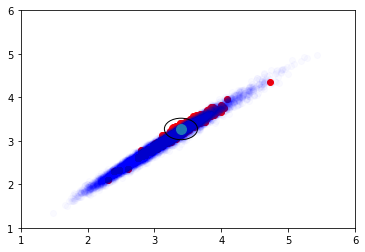

In [55]:
fig, ax = plt.subplots()
ax.scatter(trains[:,0], trains[:,1], color = 'r')
ax.scatter(tests[:,0], tests[:,1], color = 'b', alpha = 0.02)
ax.scatter(center_point[0], center_point[1], s = 100)
a = plt.Circle((center_point[0], center_point[1]), R, fill=False)
ax.set_xlim(1,6)
ax.set_ylim(1,6)
ax.add_artist(a)
plt.show()

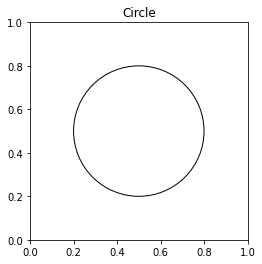

In [46]:
import matplotlib.pyplot as plt

figure, axes = plt.subplots()
draw_circle = plt.Circle((0.5, 0.5), 0.3,fill=False)

axes.set_aspect(1)
axes.add_artist(draw_circle)
plt.title('Circle')
plt.show()